<a href="https://colab.research.google.com/github/rhiats/energySegmentation/blob/main/clusteringEnergyRates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Data Overview**

The National Renewable Energy Laboratory (NREL) collected data on the average residential, commercial and industrial electricity rates  for each investor owned utility. The zip is the likely location of the utility.

In [6]:
df=pd.read_csv("/content/drive/MyDrive/iou_zipcodes_2020.csv")
df.head()

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.087890,0.000000,0.093887
1,36560,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
2,36513,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
3,36280,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
4,35473,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057


**Elbow Method**

The ideal number of clusters is 4.

In [9]:
X=df[['comm_rate','ind_rate','res_rate']]

def elbow(df):
  """
    Calculate the optimal number of clusters.

  """
  cluster_num, cost=[],[]
  for i in range(2,11):
    cluster_num.append(i)
    kmean=KMeans(n_clusters=i)
    clusters=kmean.fit_predict(X)
    cost.append(kmean.inertia_)


  return cluster_num,cost

cluster_n,cost_arr=elbow(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

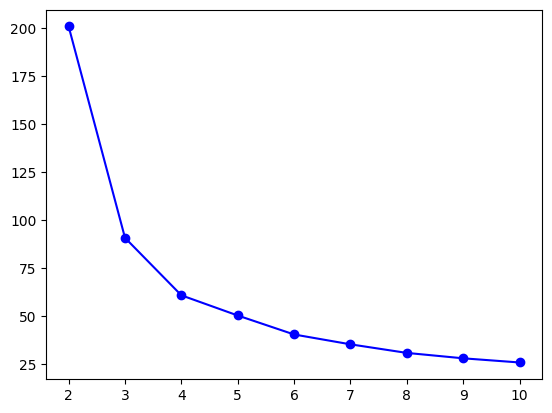

In [11]:
plt.plot(cluster_n, cost_arr, 'bo',linestyle='-')
plt.savefig('/content/drive/MyDrive/output/elbow.png')

**References**

https://catalog.data.gov/dataset/u-s-electric-utility-companies-and-rates-look-up-by-zipcode-2020